# Comparison of Sampling Techniques

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from fairpair import *

In [2]:
# Generate a new Graph to test random sampling
G = FairPairGraph()
G.generate_groups(500, 100)
G.group_assign_scores(nodes=G.majority_nodes, distr=Distributions.normal_distr)
G.group_assign_scores(nodes=G.minority_nodes, distr=Distributions.normal_distr, loc=0.3, scale=0.2) # give a disadvantage to the minority

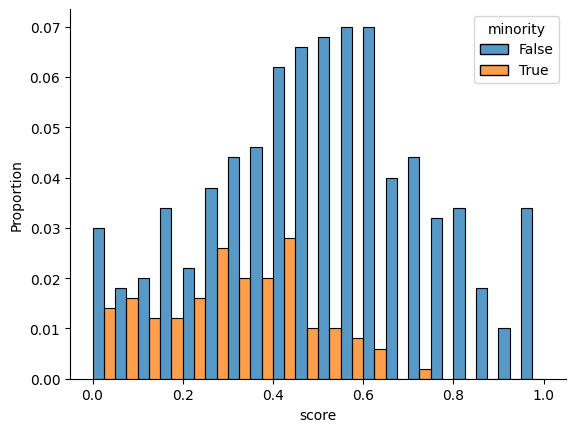

In [3]:
df = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
sns.histplot(data=df, x='score', hue='minority', stat='proportion', bins=20, multiple='dodge')
sns.despine()

## Random Sampling

minority comparisons: 3094
majority comparisons: 11906
minority success rate: 0.41
majority success rate: 0.53


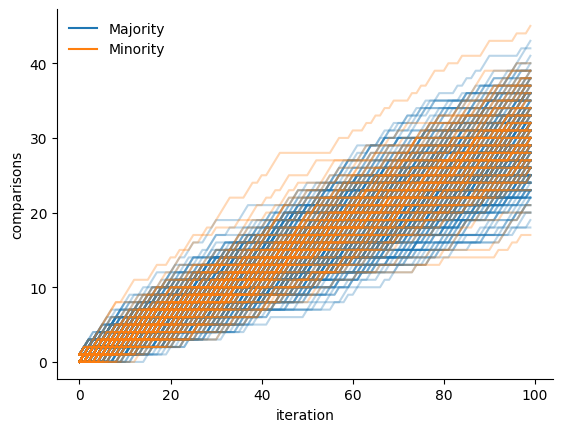

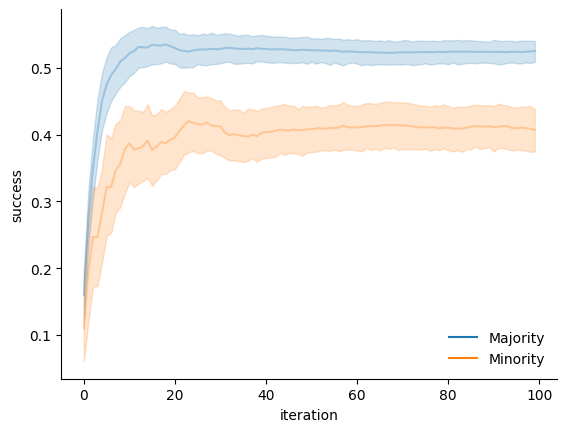

In [4]:
F = G.copy()
sampling = RandomSampling(F, log_comparisons=True, log_success=True, warn=False)
sampling.apply(iter=100, k=1)

comparisons = F.comparisons
print('minority comparisons:', round(sum([compared for node, compared in comparisons if node in F.minority_nodes]), 2))
print('majority comparisons:', round(sum([compared for node, compared in comparisons if node in F.majority_nodes]), 2))

success_rates = F.success_rates
print('minority success rate:', round(np.mean([rate for node, rate in success_rates if node in F.minority_nodes]), 2))
print('majority success rate:', round(np.mean([rate for node, rate in success_rates if node in F.majority_nodes]), 2))

sampling.plot_comparisons_over_time()
sampling.plot_success_over_time()

## ProbKnockout Sampling

minority comparisons: 2289
majority comparisons: 12711
minority success rate: 0.3
majority success rate: 0.47


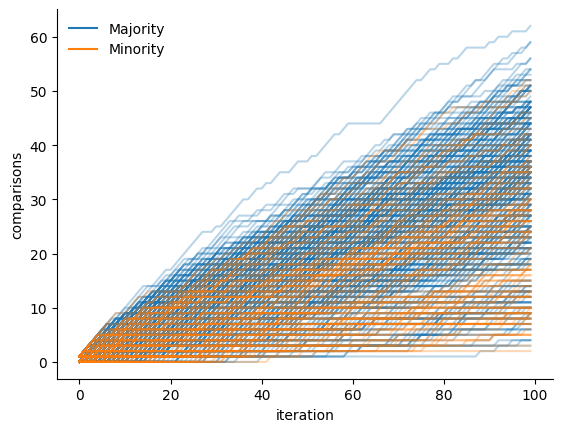

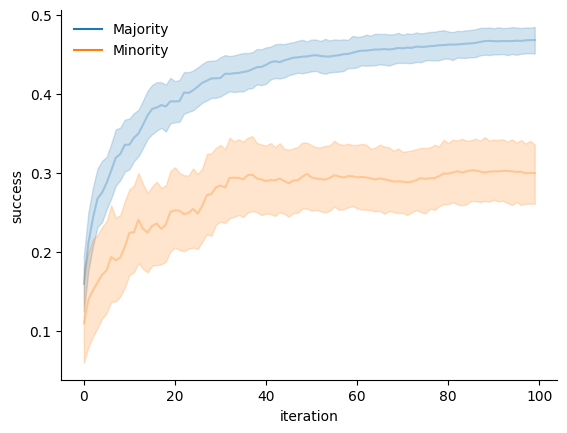

In [3]:
F = G.copy()
sampling = ProbKnockoutSampling(F, log_comparisons=True, log_success=True, warn=False)
sampling.apply(iter=100, k=1, min_prob=0.1)

comparisons = F.comparisons
print('minority comparisons:', round(sum([compared for node, compared in comparisons if node in F.minority_nodes]), 2))
print('majority comparisons:', round(sum([compared for node, compared in comparisons if node in F.majority_nodes]), 2))

success_rates = F.success_rates
print('minority success rate:', round(np.mean([rate for node, rate in success_rates if node in F.minority_nodes]), 2))
print('majority success rate:', round(np.mean([rate for node, rate in success_rates if node in F.majority_nodes]), 2))

sampling.plot_comparisons_over_time()
sampling.plot_success_over_time()

## GroupKnockout Sampling

minority comparisons: 2784
majority comparisons: 12216
minority success rate: 0.39
majority success rate: 0.52


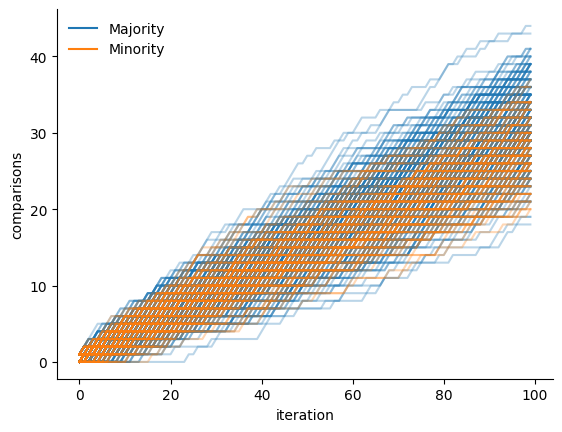

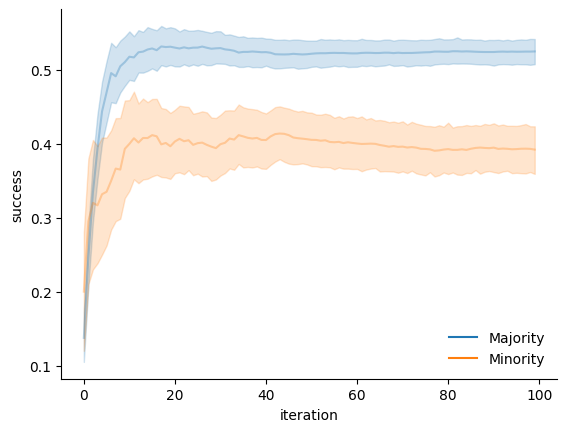

In [6]:
F = G.copy()
sampling = GroupKnockoutSampling(F, log_comparisons=True, log_success=True, warn=False)
sampling.apply(iter=100, k=1)

comparisons = F.comparisons
print('minority comparisons:', round(sum([compared for node, compared in comparisons if node in F.minority_nodes]), 2))
print('majority comparisons:', round(sum([compared for node, compared in comparisons if node in F.majority_nodes]), 2))

success_rates = F.success_rates
print('minority success rate:', round(np.mean([rate for node, rate in success_rates if node in F.minority_nodes]), 2))
print('majority success rate:', round(np.mean([rate for node, rate in success_rates if node in F.majority_nodes]), 2))

sampling.plot_comparisons_over_time()
sampling.plot_success_over_time()

## OversampleMinority

minority comparisons: 7500
majority comparisons: 7500
minority success rate: 0.45
majority success rate: 0.55


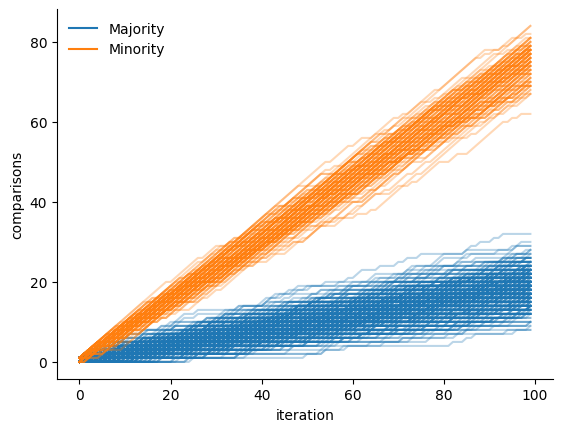

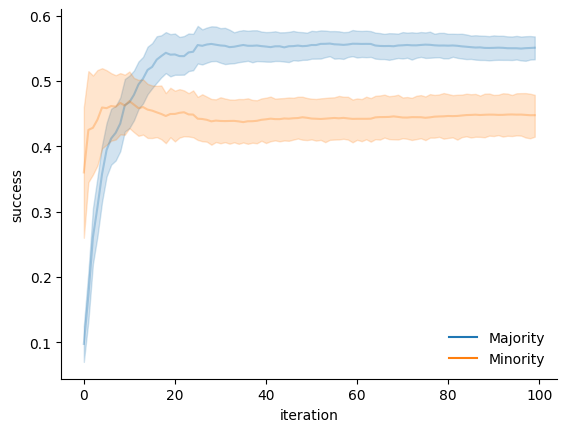

In [8]:
F = G.copy()
sampling = OversampleMinority(F, log_comparisons=True, log_success=True, warn=False)
sampling.apply(iter=100, k=1)

comparisons = F.comparisons
print('minority comparisons:', round(sum([compared for node, compared in comparisons if node in F.minority_nodes]), 2))
print('majority comparisons:', round(sum([compared for node, compared in comparisons if node in F.majority_nodes]), 2))

success_rates = F.success_rates
print('minority success rate:', round(np.mean([rate for node, rate in success_rates if node in F.minority_nodes]), 2))
print('majority success rate:', round(np.mean([rate for node, rate in success_rates if node in F.majority_nodes]), 2))

sampling.plot_comparisons_over_time()
sampling.plot_success_over_time()